In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
# Load the data and inspect them


data = pd.read_csv('TSLA.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


Successfully Read!
<br>Date: the date of each record
<br>Open: first traded price on each trading day
<br>High: highest price on each trading day
<br>Low: lowest price on each trading day
<br>Close: last price on each trading day
<br>Adj close: adjusted close price
<br>Volume: the number of stocks traded on each trading day

<ipython-input-3-6dc71b2264d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.Date = pd.to_datetime(data_new.Date, format = '%Y/%m/%d')


<Axes: xlabel='Date'>

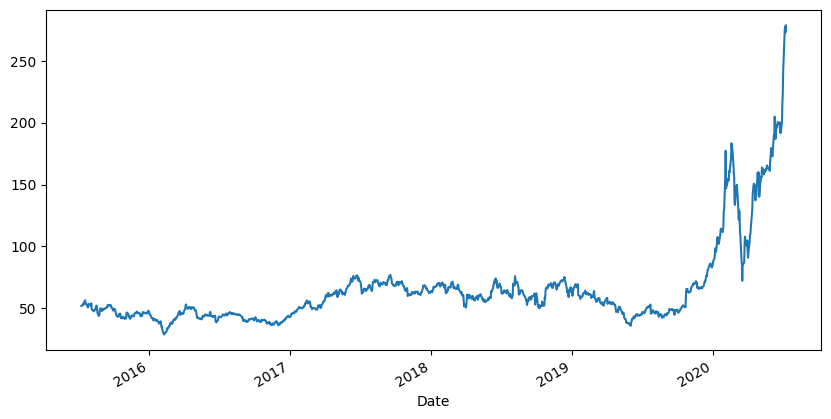

In [3]:
#visualization the stock price without lag
data_new = data[['Date', 'Close']]
data_new.Date = pd.to_datetime(data_new.Date, format = '%Y/%m/%d')
plot = data_new.set_index('Date')

plot['Close'].plot(figsize=(10,5))

In [4]:
#we will continue working with the closing price(delete the date)
data_new=data_new.drop(["Date"],axis=1)
data_new=data_new.values

In [5]:
print(data_new)

[[ 51.830002]
 [ 52.431999]
 [ 53.130001]
 ...
 [277.971985]
 [273.175995]
 [278.855988]]


In [6]:
#normalized the data

scaler = MinMaxScaler(feature_range = (0, 1))
data_new = scaler.fit_transform(data_new)

In [7]:
#split the data into training and test sets
#set that training data is about 80%, test is about 20% (as normal setting)
num_training = int(len(data_new) * 0.8)

train = data_new[:num_training]
test = data_new[num_training:]

In [8]:
#build the input features with different time lags
def input_features(data, lag):
    X, Y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:(i + lag), 0])
        Y.append(data[i + lag, 0])
    return np.array(X), np.array(Y)


In [9]:

lag1 = 1
X_train1, Y_train1 = input_features(train, lag1)
X_test1, Y_test1 = input_features(test, lag1)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], 1, X_train1.shape[1]))
X_test1 = np.reshape(X_test1, (X_test1.shape[0], 1, X_test1.shape[1]))

lag2=5
X_train2, Y_train2 = input_features(train, lag1)
X_test2, Y_test2 = input_features(test, lag1)
X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))

lag3=10
X_train3, Y_train3 = input_features(train, lag1)
X_test3, Y_test3 = input_features(test, lag1)
X_train3 = np.reshape(X_train3, (X_train3.shape[0], 1, X_train3.shape[1]))
X_test3 = np.reshape(X_test3, (X_test3.shape[0], 1, X_test3.shape[1]))


In [10]:
#create the LSTM model
def lstm(lstm_layer=4):
  model1 = Sequential()

  model1.add(LSTM(units = 256, activation = 'relu', return_sequences=True,
                 input_shape = (X_train1.shape[1], X_train1.shape[2])))
  model1.add(Dropout(0.8))

  for layer in range(lstm_layer-1):
    model1.add(LSTM(256, return_sequences= False))
    model1.add(Dropout(0.8))

    model1.add(Dense(1))

    return model1

for lstm_layer in [4,6]:
  model1=lstm(lstm_layer)

In [11]:
#create the LSTM model
def lstm(lstm_layer=4):
  model2 = Sequential()

  model2.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
                 input_shape = (X_train1.shape[1], X_train1.shape[2])))
  model2.add(Dropout(0.3))

  for layer in range(lstm_layer-1):
    model2.add(LSTM(64, return_sequences= False))
    model2.add(Dropout(0.3))

    model2.add(Dense(1))

    return model2

for lstm_layer in [4,6]:
  model2=lstm(lstm_layer)

In [12]:
#create the LSTM model
def lstm(lstm_layer=4):
  model3 = Sequential()

  model3.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
                 input_shape = (X_train1.shape[1], X_train1.shape[2])))
  model3.add(Dropout(0.4))

  for layer in range(lstm_layer-1):
    model3.add(LSTM(64, return_sequences= False))
    model3.add(Dropout(0.4))

    model3.add(Dense(1))

    return model3

for lstm_layer in [4,6]:
  model3=lstm(lstm_layer)

In [16]:
models= {"h4d2":model1(4),
       "h6d2":model1(6),
         "h4d3":model2(4),
       "h6d3":model2(6),
         "h4d4":model3(4),
       "h4d4":model3(6)}

ValueError: ignored

In [ ]:
histories={}

for name, model in models.items():
  print(f"Training model: {name}")
  model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics='accuracy')

  history = model.fit(X_train1, Y_train1, epochs = 50, batch_size = 20, validation_data = (X_test1, Y_test1), verbose = 1, shuffle = False)
  histories[name]=history



In [ ]:
for name, model in models.items():
  scores = model.evaluate(X_test1, Y_test1, verbose=1)
  print(f'{name} Test loss:', scores[0])
  print(f'{name} Test accuracy:', scores[1])


In [ ]:
plt.figure(figsize=(12, 6))

for name, history in histories.items():
    plt.plot(range(1,51),history.history['val_accuracy'][:10], label=name)

plt.title('Validation accuracy over the models')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.xticks(list(range(1,51)))
plt.legend()
plt.show()

In [ ]:
#design loss function


In [ ]:
#for i in [1,5,10]:
  #X_train, Y_train = input_features(train, i)
  #X_test, Y_test = input_features(test, i)
  #X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  #X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
#X_train= {}
#Y_train= {}
#X_test= {}
#Y_test= {}

#for i in [1,5,10]:
   # X_train[i], Y_train[i] = input_features(train, i)
    #X_test[i], Y_test[i] = input_features(test, i)

    # Reshaping
   # X_train[i] = np.reshape(X_train[i], (X_train[i].shape[0], 1, X_train[i].shape[1]))
   # X_test[i] = np.reshape(X_test[i], (X_test[i].shape[0], 1, X_test[i].shape[1]))